# Formula1 Analysis

##  Introduction
Formula1 is one of most popular race that is wached in the motorsport world. The sport features the most technically advanced cars in the world.

Interested in the evolution of technology, the world of motorsport has piqued my interest in recent years. Formua 1 has a huge history of car evolution and technology breakthroughs. Having the single goal to be the fastest car on the track, constructors develop innovative ways to improve their cars each year. 


## Data Cleanig

From an API the database tables in CSV format have been imported.
Let's start by looking, assigning columbs and merge our datasets.

##### Seting up librarys and data frames

In [322]:
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math

df1 = pd.read_csv(r'C:\Users\nirva\Desktop\Data Learning\Final assignment\f1db_csv\results.csv')
df2 = pd.read_csv(r'C:\Users\nirva\Desktop\Data Learning\Final assignment\f1db_csv\races.csv')
df3 = pd.read_csv(r'C:\Users\nirva\Desktop\Data Learning\Final assignment\f1db_csv\drivers.csv')
df4 = pd.read_csv(r'C:\Users\nirva\Desktop\Data Learning\Final assignment\f1db_csv\constructors.csv')

print(df1.head())
print(df2.head())
print(df3.head())
print(df4.head())

   resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  laps         time milliseconds  \
0            1              1    10.0    58  1:34:50.616      5690616   
1            2              2     8.0    58       +5.478      5696094   
2            3              3     6.0    58       +8.163      5698779   
3            4              4     5.0    58      +17.181      5707797   
4            5              5     4.0    58      +18.014      5708630   

  fastestLap rank fastestLapTime fastestLapSpeed  statusId  
0         39    2       1:27.452         218.300         1  
1         41    3 

##### Merging the data frames based on the structure of the database Relationship Diagram and explaination

In [286]:
# merging the 4 data frames in to one large datasets
df = pd.merge(df1, df2, on = 'raceId', how='left')
df = pd.merge(df, df3, on = 'driverId', how='left')
df = pd.merge(df, df4, on = 'constructorId', how='left')

df.info()
#Review: Take variables known before the race and use it for prediction

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25540 entries, 0 to 25539
Data columns (total 47 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25540 non-null  int64  
 1   raceId           25540 non-null  int64  
 2   driverId         25540 non-null  int64  
 3   constructorId    25540 non-null  int64  
 4   number_x         25540 non-null  object 
 5   grid             25540 non-null  int64  
 6   position         25540 non-null  object 
 7   positionText     25540 non-null  object 
 8   positionOrder    25540 non-null  int64  
 9   points           25540 non-null  float64
 10  laps             25540 non-null  int64  
 11  time_x           25540 non-null  object 
 12  milliseconds     25540 non-null  object 
 13  fastestLap       25540 non-null  object 
 14  rank             25540 non-null  object 
 15  fastestLapTime   25540 non-null  object 
 16  fastestLapSpeed  25540 non-null  object 
 17  statusId    

##### Subsetting needed columns and filtering data

In [287]:
#filtering columns needed
df = df[['grid', 'positionOrder', 'points', 'time_x', 'milliseconds', 'rank', 'fastestLapTime', 'fastestLapSpeed','laps', 'year','round', 'name_x', 'driverRef', 'constructorRef']]

# rename columns
df.rename(columns={'rank': 'fastestLapRank', 'name_x': 'gp', 'driverRef': 'driver', 'time_x': 'time'}, inplace=True)
# rearrange columns
df = df[['year', 'gp', 'round', 'driver', 'constructorRef','grid','positionOrder','points','time','milliseconds','fastestLapRank','fastestLapTime','fastestLapSpeed','laps']]
# sort values
df = df.sort_values(by=['year', 'round','positionOrder'], ascending = [False, True, True])
df.head(50)


,year,gp,round,driver,constructorRef,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,laps
25400,2022,Bahrain Grand Prix,1,leclerc,ferrari,1,1,26.0,1:37:33.584,5853584,1,1:34.570,206.018,57
25401,2022,Bahrain Grand Prix,1,sainz,ferrari,3,2,18.0,+5.598,5859182,3,1:35.740,203.501,57
25402,2022,Bahrain Grand Prix,1,hamilton,mercedes,5,3,15.0,+9.675,5863259,5,1:36.228,202.469,57
25403,2022,Bahrain Grand Prix,1,russell,mercedes,9,4,12.0,+11.211,5864795,6,1:36.302,202.313,57
25404,2022,Bahrain Grand Prix,1,kevin_magnussen,haas,7,5,10.0,+14.754,5868338,8,1:36.623,201.641,57
25405,2022,Bahrain Grand Prix,1,bottas,alfa,6,6,8.0,+16.119,5869703,7,1:36.599,201.691,57
25406,2022,Bahrain Grand Prix,1,ocon,alpine,11,7,6.0,+19.423,5873007,14,1:37.110,200.630,57
25407,2022,Bahrain Grand Prix,1,tsunoda,alphatauri,16,8,4.0,+20.386,5873970,13,1:37.104,200.642,57
25408,2022,Bahrain Grand Prix,1,alonso,alpine,8,9,2.0,+22.390,5875974,10,1:36.733,201.412,57
25409,2022,Bahrain Grand Prix,1,zhou,alfa,15,10,1.0,+23.064,5876648,9,1:36.685,201.512,57


#### Exlanations of the variables that were selected from the database:
- year: the season that the Grand Prix took place.
- gp: the name of the Grand Prix.
- round: the number of the race in each season.
- driver: the name of the driver.
- constructorName: the name of the car constructor.
- grid: the starting position before the race (depends on the qualifications which occur one day before the race).
- positionOrder: the final position at the end of the race.
- points: number of points scored in the race.
- time: the amount of time that took to finish the race. Only the winner's time is displayed and driver's behind the winner are shown how far behind the winner they were. If a driver did not finish the race or was lapped by another driver, the value is null.
- milliseconds: the amount of time that took to finish the race in milliseconds. 
- fastestLapRank: the order of the fastest lap during a race.
- fastestLapTime: the shortest amount of time that took to complete a lap in the race.
- fastestLapSpeed: average speed on the fastest lap.
- laps: Number of laps made ( some drivers were outlaped so they will have less laps at the end of the race )



The qualifications time and practices time are intresting variebles to predicte the outcome of races, but the data is incomplet in the database excepte for 2022. 

##### Cleaning the data

In [288]:
#Replacing \N to NaN 
#if we drop all nan rows, we will end up losing a lot of potentially useful data 
df.time.replace('\\N', np.nan, inplace=True)
df.milliseconds.replace('\\N', np.nan, inplace=True)
df.fastestLapRank.replace('\\N', np.nan, inplace=True)
df.fastestLapTime.replace('\\N', np.nan, inplace=True)
df.fastestLapSpeed.replace('\\N', np.nan, inplace=True)

In [289]:
# change datatypes
#int type run into error
df.fastestLapSpeed = df.fastestLapSpeed.astype(float)
df.fastestLapRank = df.fastestLapRank.astype(float)
df.milliseconds = df.milliseconds.astype(float)


In [290]:
# reset index
df.reset_index(drop = True, inplace=True)

In [291]:
print(df.shape)
print(df.info())

(25540, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25540 entries, 0 to 25539
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             25540 non-null  int64  
 1   gp               25540 non-null  object 
 2   round            25540 non-null  int64  
 3   driver           25540 non-null  object 
 4   constructorRef   25540 non-null  object 
 5   grid             25540 non-null  int64  
 6   positionOrder    25540 non-null  int64  
 7   points           25540 non-null  float64
 8   time             6896 non-null   object 
 9   milliseconds     6895 non-null   float64
 10  fastestLapRank   7291 non-null   float64
 11  fastestLapTime   7089 non-null   object 
 12  fastestLapSpeed  7089 non-null   float64
 13  laps             25540 non-null  int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 2.7+ MB
None


In [292]:
df.head(100)

,year,gp,round,driver,constructorRef,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,laps
0,2022,Bahrain Grand Prix,1,leclerc,ferrari,1,1,26.0,1:37:33.584,5853584.0,1.0,1:34.570,206.018,57
1,2022,Bahrain Grand Prix,1,sainz,ferrari,3,2,18.0,+5.598,5859182.0,3.0,1:35.740,203.501,57
2,2022,Bahrain Grand Prix,1,hamilton,mercedes,5,3,15.0,+9.675,5863259.0,5.0,1:36.228,202.469,57
3,2022,Bahrain Grand Prix,1,russell,mercedes,9,4,12.0,+11.211,5864795.0,6.0,1:36.302,202.313,57
4,2022,Bahrain Grand Prix,1,kevin_magnussen,haas,7,5,10.0,+14.754,5868338.0,8.0,1:36.623,201.641,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022,Miami Grand Prix,5,kevin_magnussen,haas,16,16,0.0,NaN,NaN,17.0,1:33.511,208.351,56
96,2022,Miami Grand Prix,5,vettel,aston_martin,0,17,0.0,NaN,NaN,16.0,1:33.479,208.423,54
97,2022,Miami Grand Prix,5,gasly,alphatauri,7,18,0.0,NaN,NaN,19.0,1:34.487,206.199,45
98,2022,Miami Grand Prix,5,norris,mclaren,8,19,0.0,NaN,NaN,14.0,1:33.411,208.575,39


## Exploratory data analysis

Lets first have a look on the top 10 Grand Prix wins. It's intresting to see in all history of Formula1 Wich diver had the most succes of wining a GP and than have a look at the times. 

Text(0.5, 0, 'Number of GP wins')

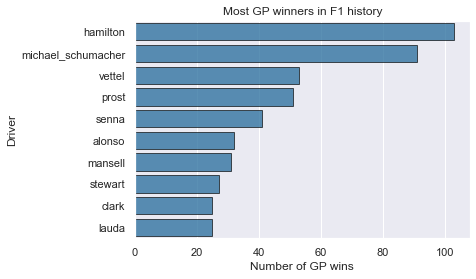

In [293]:
# create new dataframe of top 10 GP winners
data_top10 = data_driver_all.head(10)

#create barplot
sns.barplot(data = data_top10, y = 'driver', x = 'positionOrder', color = base_color,
           alpha = 0.8, linewidth=.8, edgecolor="black")
plt.title('Most GP winners in F1 history')
plt.ylabel('Driver')
plt.xlabel('Number of GP wins')

We can confirme the data is accurarat whit today's results so know lets have a deeper look on the times and number 1 position drivers.

In [294]:
#Subseting years from 2012 to 2022
# select rows where col year values are greater than 2012
#df_number1 = df[df.year > 2012]
df_number1 = df.loc[df['positionOrder'] == 1]
df_number1["fastestLapTime"] = pd.to_datetime(df_number1["fastestLapTime"],format= '%M:%S.%f' ).dt.time
df_number1.head(355)

C:\Users\nirva\AppData\Local\Temp/ipykernel_28004/1315565046.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,year,gp,round,driver,constructorRef,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,laps
0,2022,Bahrain Grand Prix,1,leclerc,ferrari,1,1,26.0,1:37:33.584,5853584.0,1.0,00:01:34.570000,206.018,57
20,2022,Saudi Arabian Grand Prix,2,max_verstappen,red_bull,4,1,25.0,1:24:19.293,5059293.0,2.0,00:01:31.772000,242.191,50
40,2022,Australian Grand Prix,3,leclerc,ferrari,1,1,26.0,1:27:46.548,5266548.0,1.0,00:01:20.260000,236.740,58
60,2022,Emilia Romagna Grand Prix,4,max_verstappen,red_bull,1,1,26.0,1:32:07.986,5527986.0,1.0,00:01:18.446000,225.281,63
80,2022,Miami Grand Prix,5,max_verstappen,red_bull,3,1,26.0,1:34:24.258,5664258.0,1.0,00:01:31.361000,213.255,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7411,2004,Brazilian Grand Prix,18,montoya,williams,2,1,10.0,1:28:01.451,5281451.0,1.0,00:01:11.473000,217.038,71
7431,2003,Australian Grand Prix,1,coulthard,mclaren,11,1,10.0,1:34:42.1,5682100.0,NaN,NaT,NaN,58
7451,2003,Malaysian Grand Prix,2,raikkonen,mclaren,7,1,10.0,1:32:22.195,5542195.0,NaN,NaT,NaN,56
7471,2003,Brazilian Grand Prix,3,fisichella,jordan,8,1,10.0,1:31:18.2,5478200.0,NaN,NaT,NaN,54


Trying to create a graph that shows the fastes lap time per gp and driver position. 
The data on fastestLapRank	fastestLapTime	fastestLapSpeed is available from the year 2004.

In [295]:
# change data type of fastestLapTime column
#df_number1 = pd.DataFrame(data=df_number1)
#df_number1 = pd.to_timedelta[df_number1['positionOrder']]
#df_number1["fastestLapTime"] = df_number1["fastestLapTime"]..applymap(lambda x: str(x.replace(':','.')))
                              
# fastes time per Gp
#create barplot
#sns.set_theme()

#g = sns.lmplot(data=df_number1,x="fastestLapSpeed", y="fastestLapTime", hue="grid",height=5)
# Use more informative axis labels than are provided by default
#g.set_axis_labels("Starting grid", "Final position")


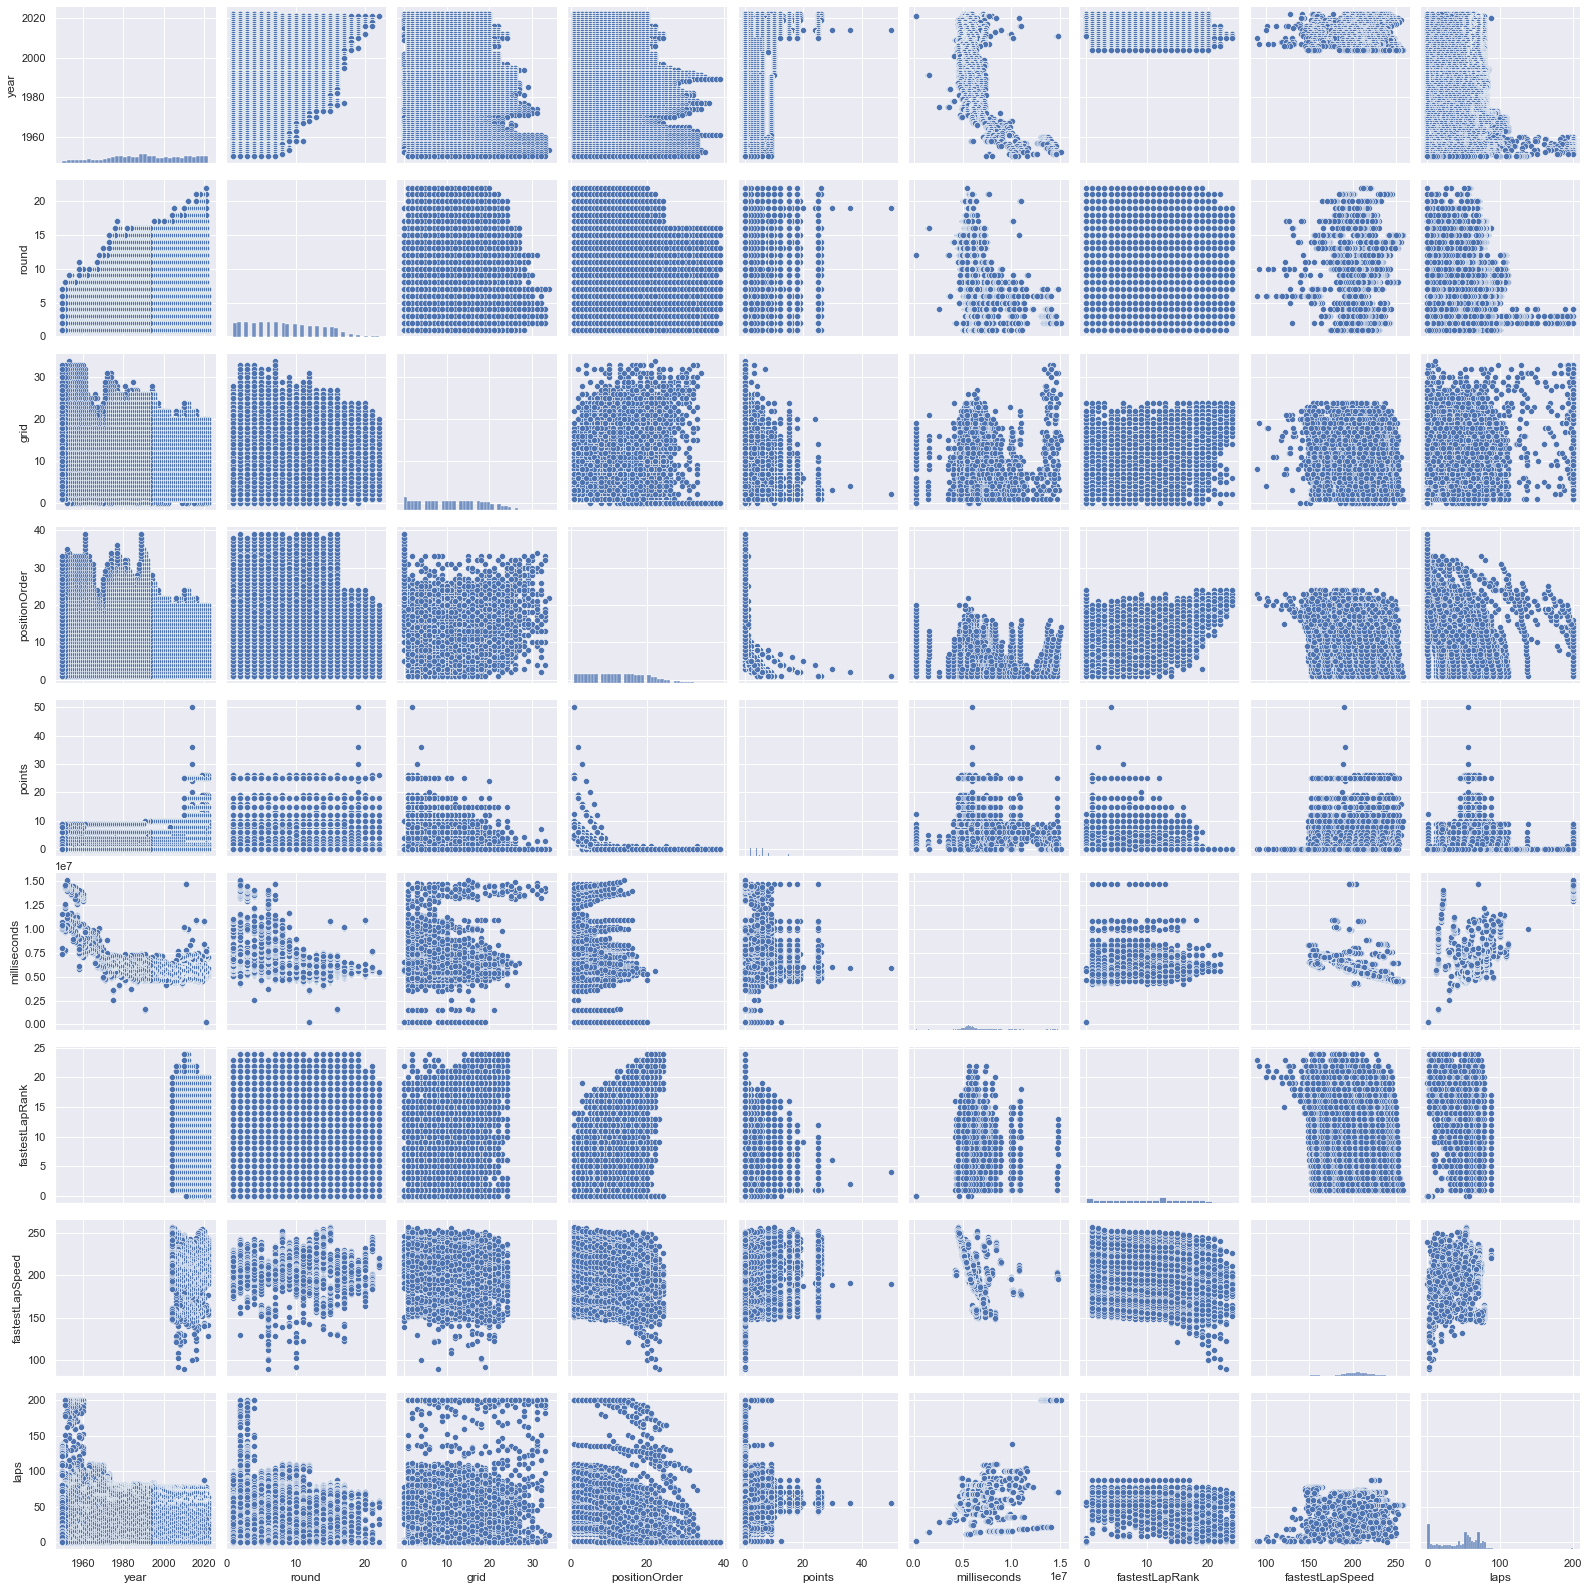

In [296]:
sns.pairplot(df)
plt.show()

C:\Users\nirva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



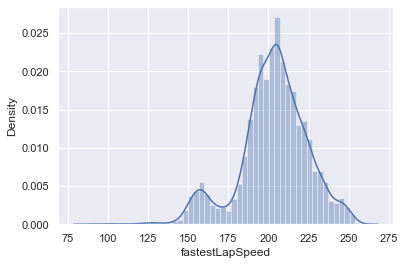

In [297]:
#sns.distplot(df['grid'])
#sns.distplot(df['positionOrder'])
sns.distplot(df['fastestLapSpeed'])
plt.show()

The graph for the fastestLapSpeed shows a normal distribution. 

In [298]:
# correlation matrix of the numerical variables
corr = df.corr()
corr

,year,round,grid,positionOrder,points,milliseconds,fastestLapRank,fastestLapSpeed,laps
year,1.000000,0.308550,-0.004648,-0.091610,0.271148,-0.508247,-0.060295,0.047176,0.045959
round,0.308550,1.000000,0.015645,-0.009717,0.077287,-0.259005,0.002689,0.069880,-0.035091
grid,-0.004648,0.015645,1.000000,0.151998,-0.367979,0.094794,0.591539,-0.126220,0.077347
positionOrder,-0.091610,-0.009717,0.151998,1.000000,-0.570209,-0.049542,0.634720,-0.171724,-0.653418
points,0.271148,0.077287,-0.367979,-0.570209,1.000000,-0.069362,-0.551350,0.089880,0.252192
milliseconds,-0.508247,-0.259005,0.094794,-0.049542,-0.069362,1.000000,0.115076,-0.515812,0.595929
fastestLapRank,-0.060295,0.002689,0.591539,0.634720,-0.551350,0.115076,1.000000,-0.198329,-0.171737
fastestLapSpeed,0.047176,0.069880,-0.126220,-0.171724,0.089880,-0.515812,-0.198329,1.000000,-0.061379
laps,0.045959,-0.035091,0.077347,-0.653418,0.252192,0.595929,-0.171737,-0.061379,1.000000


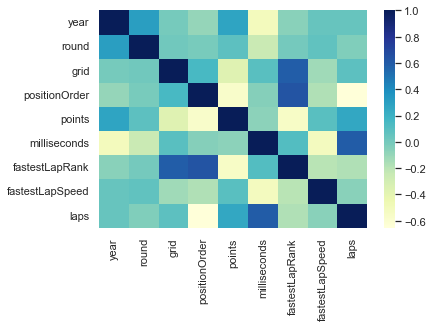

In [299]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu") #the last two arguments set the column names
plt.show()

We can see from the correlation heat map tha we have a stong correlation beteewn:
- grid & fastest lap rank
- position order & fastest lap rank

The corelation is not strong but the grid and positionOrder can be seen.

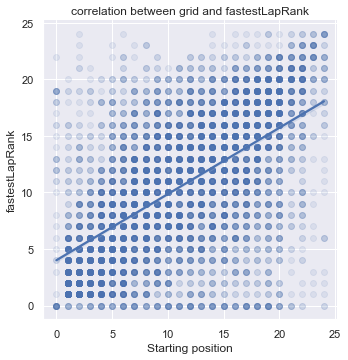

In [300]:
sns.lmplot(x='grid', y='fastestLapRank', fit_reg=True, data=df, scatter_kws={'alpha':0.1}) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Starting position') #use matplotlib to refine Seaborn plot
plt.ylabel('fastestLapRank')
plt.title('correlation between grid and fastestLapRank')
plt.show()

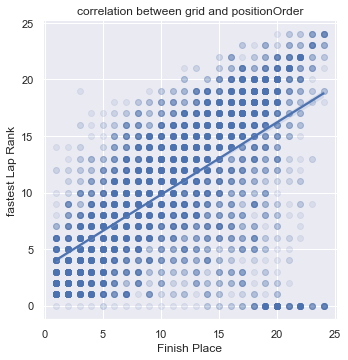

In [301]:
sns.lmplot(x='positionOrder', y='fastestLapRank', fit_reg=True, data=df, scatter_kws={'alpha':0.1}) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Finish Place') #use matplotlib to refine Seaborn plot
plt.ylabel('fastest Lap Rank')
plt.title('correlation between grid and positionOrder')
plt.show()

We will look also at the relationship between starting and finishing positions. In addition, we will investigate how speed changed over time at various tracks.

In [302]:
#sns.lmplot(x='grid', y='positionOrder', fit_reg=True, data=df, scatter_kws={'alpha':0.1}) #fit_reg=False leaves out the regression line; see below
#plt.xlabel('Starting position') #use matplotlib to refine Seaborn plot
#plt.ylabel('Finish Place')
#plt.title('Starting position vs Finish place')
#plt.show()

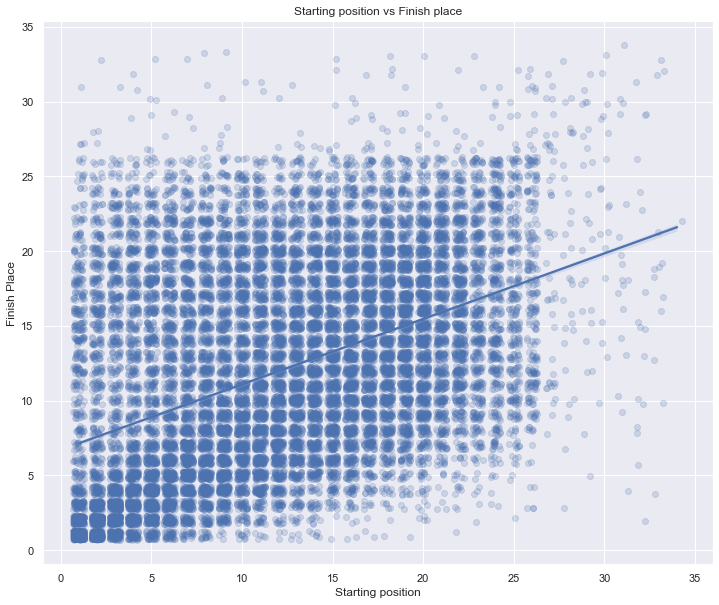

In [303]:
# improving Starting position vs Finish place Graph
#excluding grid = 0
df_no_zero = df[df['grid'] != 0]

# create a plot
plt.figure(figsize = [12, 10])
sb.regplot(data = df_no_zero, x = 'grid', y = 'positionOrder', x_jitter = 0.3, y_jitter = 0.3, scatter_kws = {'alpha' : 1/5});
plt.title('Starting position vs Finish place')
plt.ylabel('Finish Place')
plt.xlabel('Starting position');

This chart shows a linear relationship between the beginning and finishing positions, as expected. We can also observe that most races had up to 25 drivers, with several having more than 30. In this era of formula 1 (2020's)  we have 10 teams whith 2 drivers per teams.

We'll look into whether the speed of the autos has altered over time. Because this information is only accessible beginning with the 2004 season,

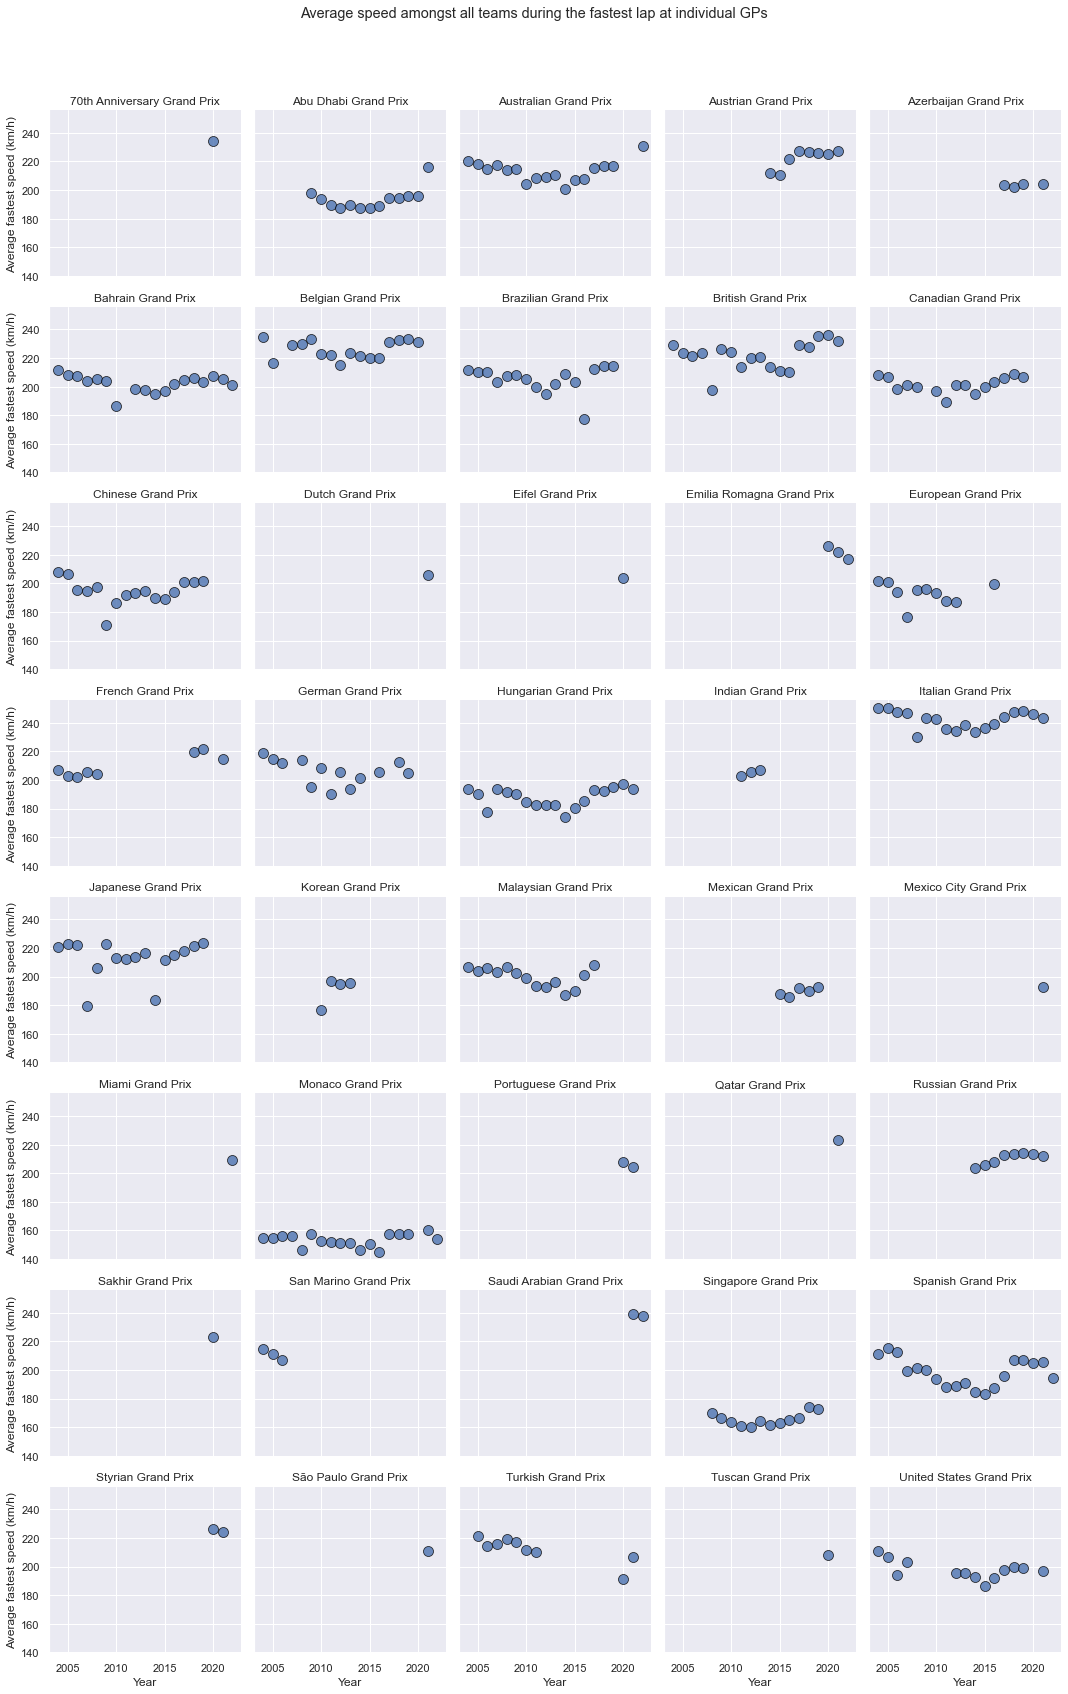

In [304]:
# creating new data frame from  2004 
df_speed = df[df['year'] >= 2004]
df_group_speed = df_speed.groupby(['gp', 'year'])['fastestLapSpeed'].mean().to_frame().reset_index()

# create a facetgrid
g = sb.FacetGrid(data = df_group_speed, col = 'gp',
                col_wrap=5)
g.map(plt.scatter, 'year','fastestLapSpeed', alpha = 0.8, linewidth=.8, edgecolor="black", s = 100 )
g.set_titles("{col_name}")
g.set_xlabels('Year')
g.set_ylabels('Average fastest speed (km/h)')
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Average speed amongst all teams during the fastest lap at individual GPs');

We can see through this mutiple graphs the fastest lap speed per GP. We can see that some data are still missing for some years. The speed will depend on the car's weight, Engine, Chassis and Aerodynamics. There are external factors like the track and weather conditions. 

Some tacks have long straights so the vehicles can reach speeds above 240km/h like the Italian GP. But short and narrow tracks like The Monaco GP are not favourable for a high-speed chase. 

That shows the F1 is not only about baking seed records but also about knowing to analyse each track and adapt to the changing conditions.

## Predictive models

We will use a Linear regression for our predictive model.


For our study, we will take the fastestLapSpeed as ous dependent variable.
For our independent variables we will use gp, grid, positionOrder, milliseconds and fastestLapRank.

Creating dummy variables for the categorical variables:

In [338]:
p_df = df_speed[['fastestLapSpeed','gp','grid','positionOrder','milliseconds','fastestLapRank','laps']]
p_df = p_df.dropna()
p_df.head()

,fastestLapSpeed,gp,grid,positionOrder,milliseconds,fastestLapRank,laps
0,206.018,Bahrain Grand Prix,1,1,5853584.0,1.0,57
1,203.501,Bahrain Grand Prix,3,2,5859182.0,3.0,57
2,202.469,Bahrain Grand Prix,5,3,5863259.0,5.0,57
3,202.313,Bahrain Grand Prix,9,4,5864795.0,6.0,57
4,201.641,Bahrain Grand Prix,7,5,5868338.0,8.0,57


In [343]:
#sns.pairplot(p_df,hue='gp')

In [339]:
dum = pd.get_dummies(df_speed['gp'])
# as a requierment for the machine learning model We should take out the 1stcolumn
dum = pd.get_dummies(df_speed['gp']).iloc[:,1:]
#dum.rename(columns={'Male': 'gender'}, inplace=True)
dum.head()

,Abu Dhabi Grand Prix,Australian Grand Prix,Austrian Grand Prix,Azerbaijan Grand Prix,Bahrain Grand Prix,Belgian Grand Prix,Brazilian Grand Prix,British Grand Prix,Canadian Grand Prix,Chinese Grand Prix,...,Sakhir Grand Prix,San Marino Grand Prix,Saudi Arabian Grand Prix,Singapore Grand Prix,Spanish Grand Prix,Styrian Grand Prix,São Paulo Grand Prix,Turkish Grand Prix,Tuscan Grand Prix,United States Grand Prix
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [340]:
#p2_df = pd.concat([p_df, dum],axis=1)
#p2_df.head()

Because their are lots of GP's, i will finaly only use for our independent variables grid, positionOrder, milliseconds and fastestLapRank.

Fiting a linear regression model to predict the fastest Lap Speed, using the training data.

In [320]:
# Specify the independent variables (X) and dependent variable (y)
y = p_df['fastestLapSpeed'] #We need to take out the rating as our Y-variable
X = p_df[['grid','positionOrder','milliseconds','fastestLapRank','laps']]
X.head()

,grid,positionOrder,milliseconds,fastestLapRank,laps
0,1,1,5853584.0,1.0,57
1,3,2,5859182.0,3.0,57
2,5,3,5863259.0,5.0,57
3,9,4,5864795.0,6.0,57
4,7,5,5868338.0,8.0,57


We now have our X and y, and can start training the model. First, let's split the data into a training set and a test set.

In [323]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables
X_train.head() #The train data

,grid,positionOrder,milliseconds,fastestLapRank,laps
3245,8,4,5113371.0,13.0,44
2870,17,11,7379625.0,11.0,61
4497,3,1,5321196.0,1.0,52
1820,3,1,5288743.0,3.0,52
4116,3,4,4810888.0,12.0,53


In [324]:
y_train = np.nan_to_num(y_train)
X_train = np.nan_to_num(X_train)
# let's train the linear model.
lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model

In [325]:
coef = pd.DataFrame(X.columns.values, lm.coef_) #this creates a df with a column with the column names, and the coefficients of the model
coef

,0
0.079784,grid
-0.067547,positionOrder
-0.000009,milliseconds
-0.478038,fastestLapRank
-0.907213,laps


In [326]:
X_test = np.nan_to_num(X_test)
y_test_p = lm.predict(X_test) #use built-in predict() method to generate predictions

We should now evaluate the performance of our modele

We need to generate predictions and calculate the R^2 and RMSE.

In [327]:
r2_score(y_test, y_test_p)

0.40207277297341326

The R^2 is 0.40, which means 40% of the variation in speed is explained by the model.

In [344]:
math.sqrt(mean_squared_error(y_test, y_test_p)) #this gives the model fit (R2) for the Y

16.497672180400173

We have errors of + or - 16 km/h.

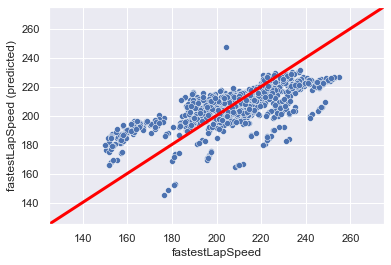

In [335]:
sns.scatterplot(x=y_test,y=y_test_p)
plt.xlim(125, 275) #This sets the x-axis limits to (0, 5e10 = 140000000000)
plt.ylim(125, 275) #Ditto for y-axis. I want both axes to have the same length, so we can compare them
plt.plot([125, 275], [125, 275], color='red', lw=3) #This draws the straight red line, you can leave this out if you wish
plt.xlabel('fastestLapSpeed')
plt.ylabel('fastestLapSpeed (predicted)')
plt.show()

On the x-axis we have the actual fastest Lap Speed. On the y-axis we have the predicted fastest Lap Speed.

The model is good.

## Conclusion

The objective at first was to predict the final position of a driver from the start of the grid. It was an ambisious task.

Predictinthe fastest average speed has been a great study, for the independent variables I coul only use numemerical variables and categorical beceause of the large data.

My analysis of this dataset is sucsefuly achieved.


## References & Reaserch

Data Learning cours by jonas Moons

Datasets:
- http://ergast.com/mrd/db/#csv
- http://ergast.com/images/ergast_db.png

Data cleaning:
- https://stackoverflow.com/
- https://tutorial.eyehunts.com/python/python-strftime-function-milliseconds-examples/

Exploratory data:
- https://datatofish.com/bar-chart-python-matplotlib/
- https://seaborn.pydata.org/examples/index.html
- https://www.delftstack.com/howto/matplotlib/use-of-pyplot.figure-matplotlib/
- https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

Predictive modele:
- https://github.com/Nirvana2r/Data-Learning-/blob/main/Weekly%20assignment%201-3/Fitbit.ipynb (Weekly Asignement)
- https://bolimsydneyson.github.io/machine-learning/
- https://www.geeksforgeeks.org/how-to-create-dummy-variables-in-python-with-pandas/


Articles & codes:
- https://towardsdatascience.com/predicting-formula-1-results-with-elo-ratings-908470694c9c
- https://github.com/CesarMendozza/F1/blob/master/F1_Practice.ipynb
- https://medium.com/towards-formula-1-analysis/how-to-visualize-the-formula-1-championship-in-python-using-the-ergast-api-and-seaborn-ac2f88ae7248
- https://towardsdatascience.com/formula-1-race-predictor-5d4bfae887da
- https://www.f1technical.net/features/21637
- https://github.com/tienou29/vivepakitest/blob/master/FinalAssignmentEtienneRALEC.ipynb


